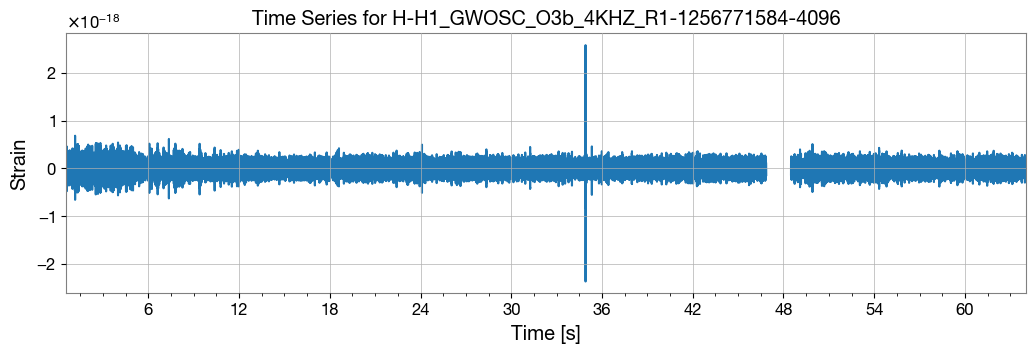

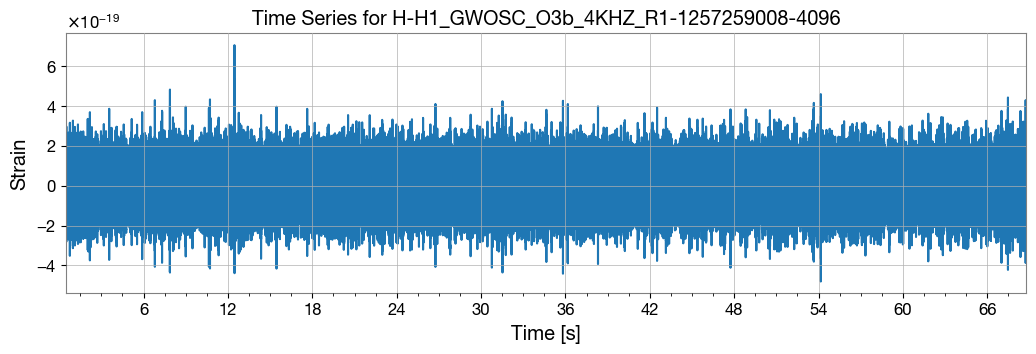

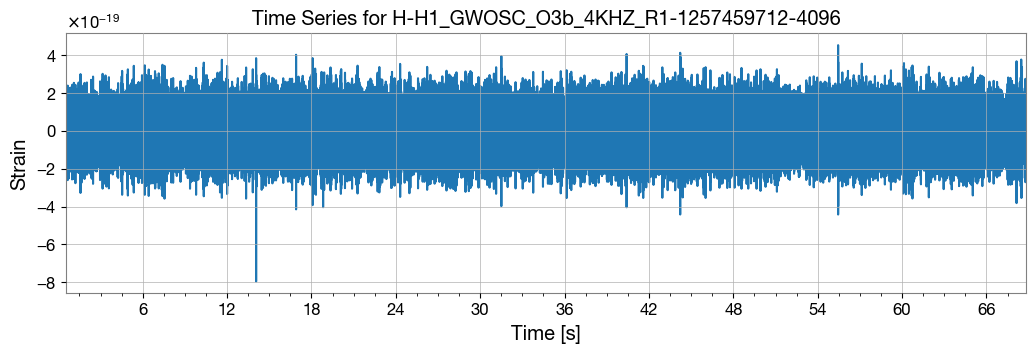

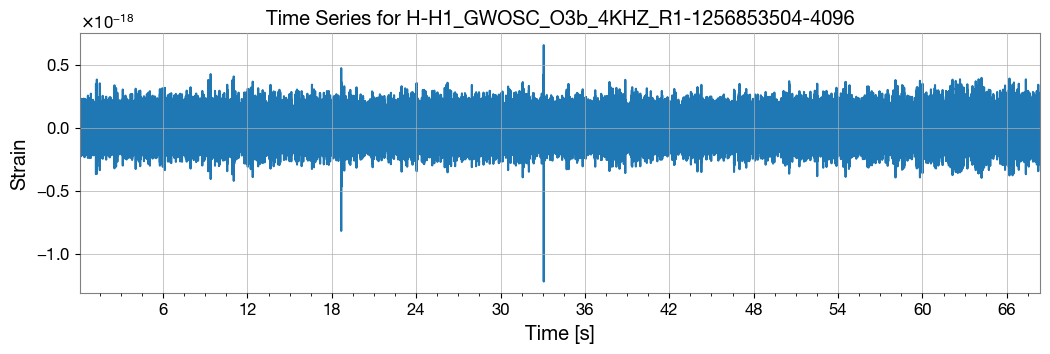

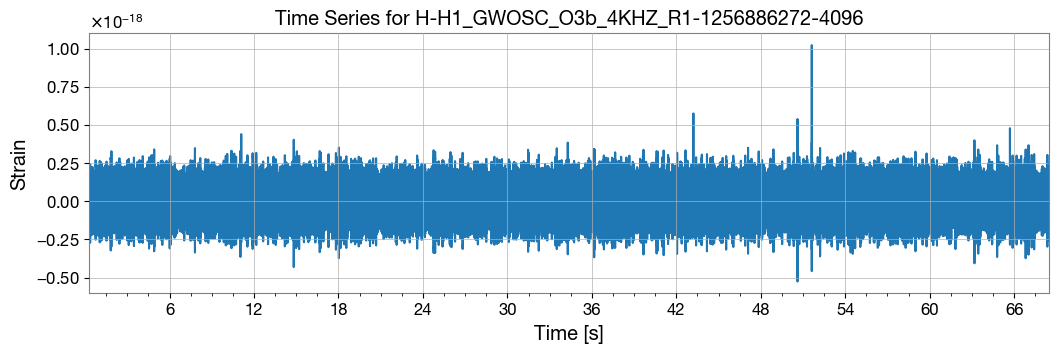

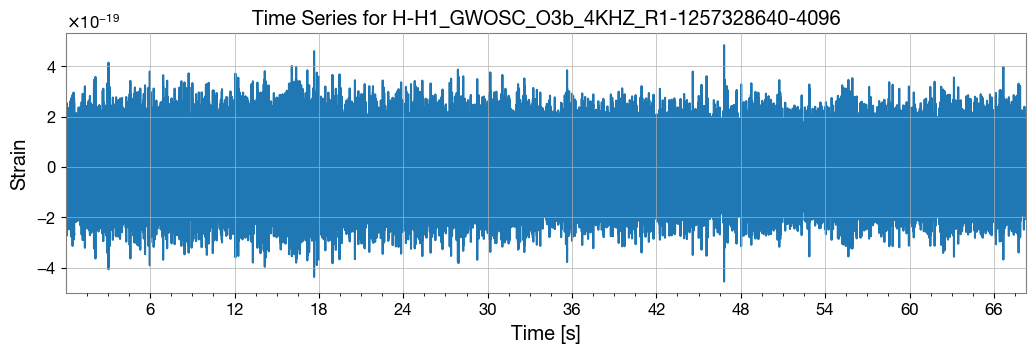

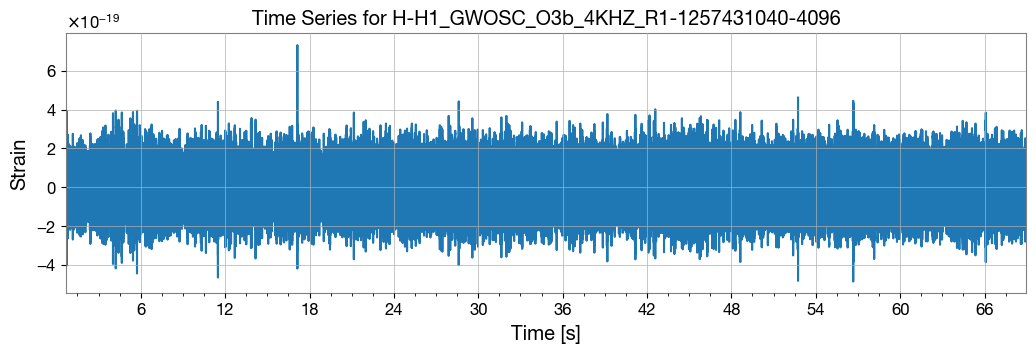

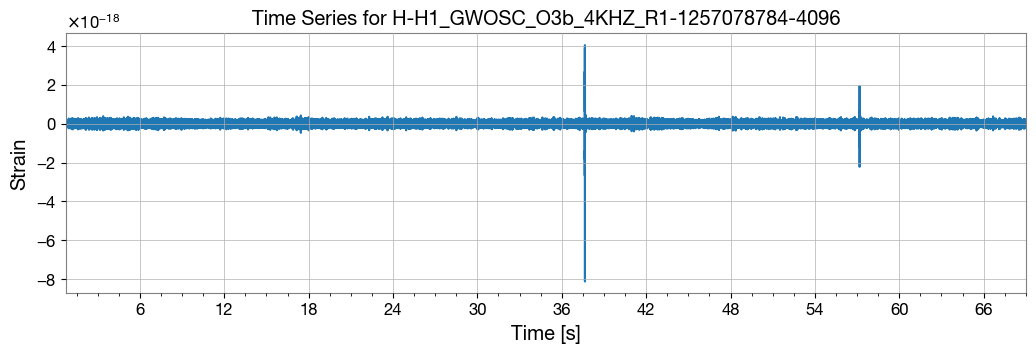

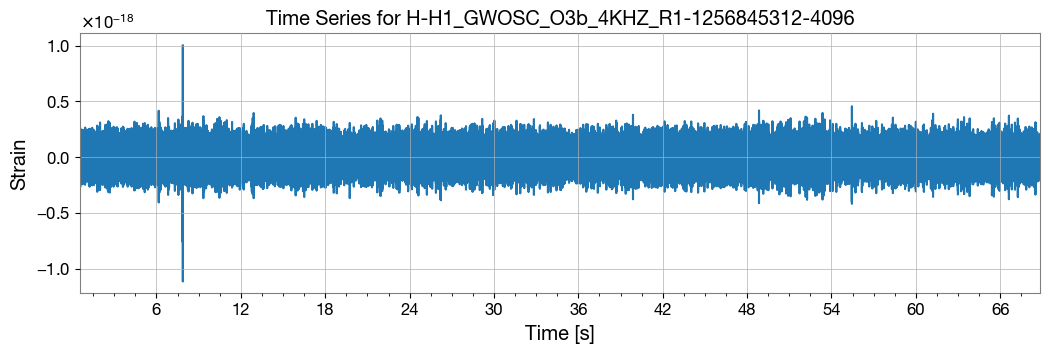

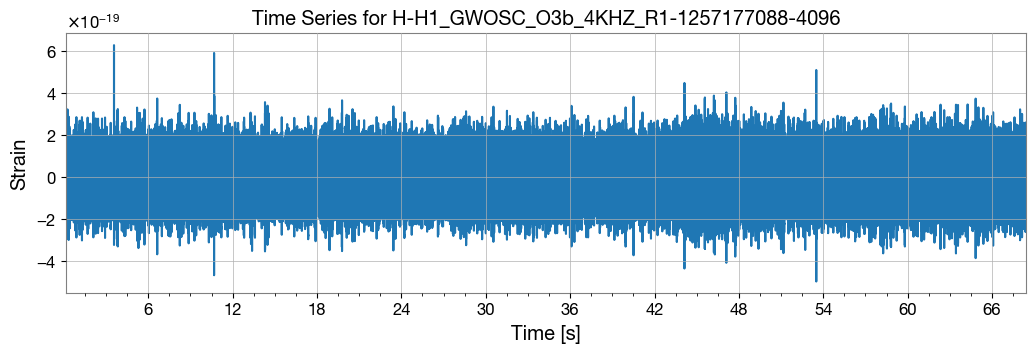

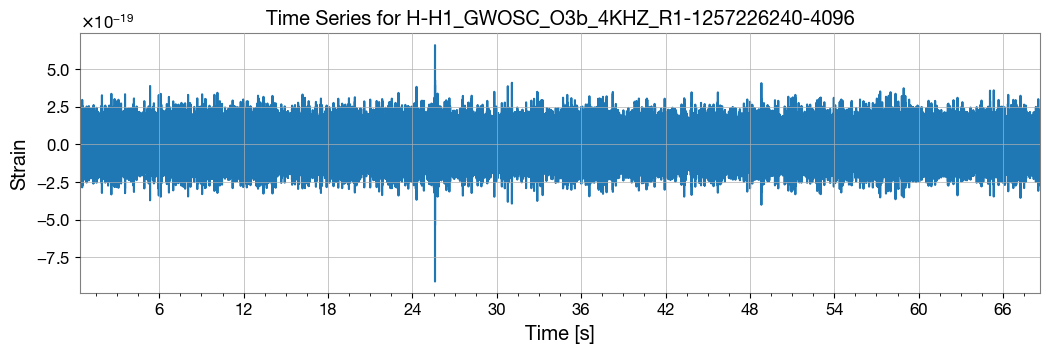

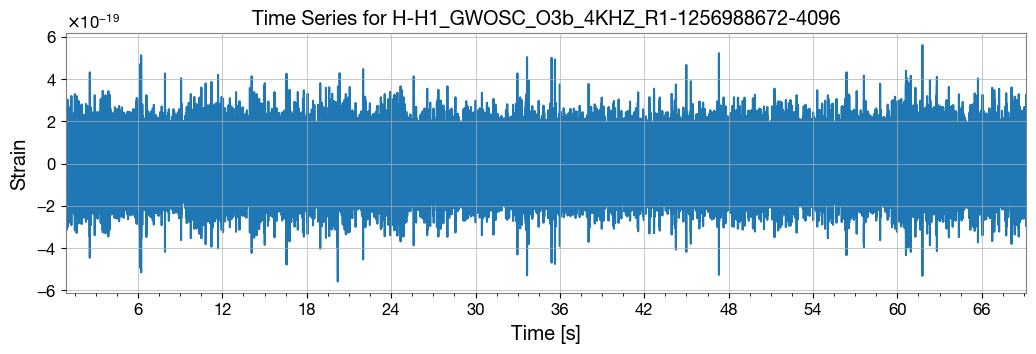

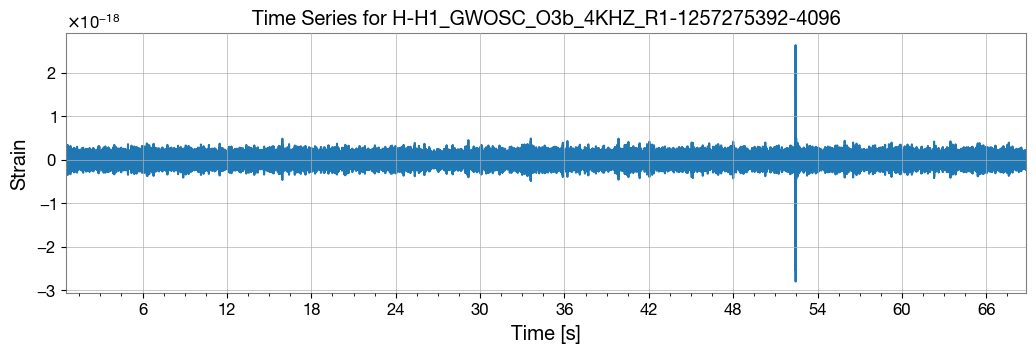

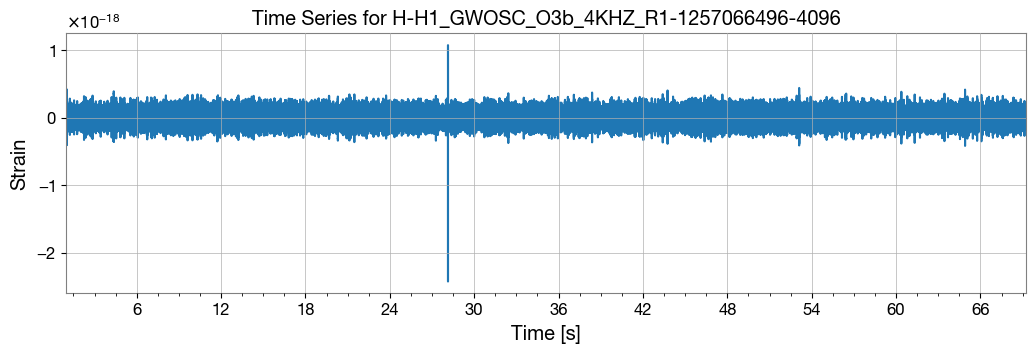

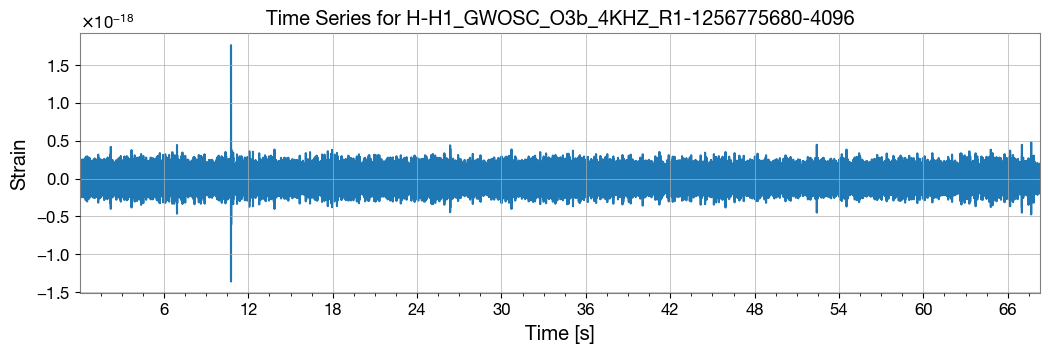

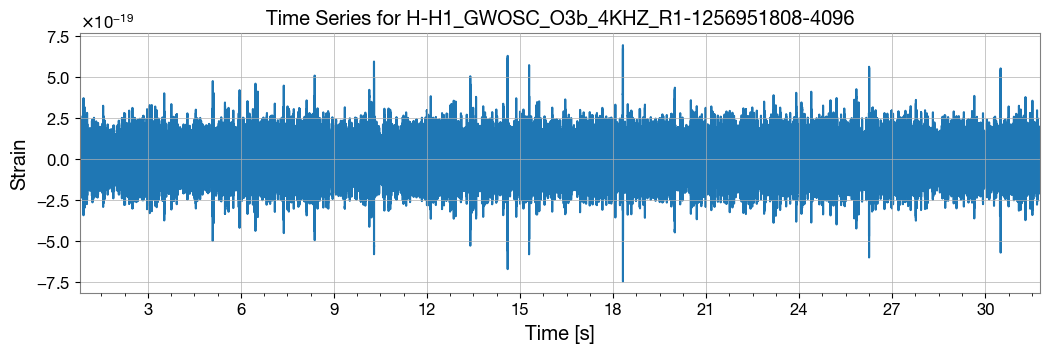

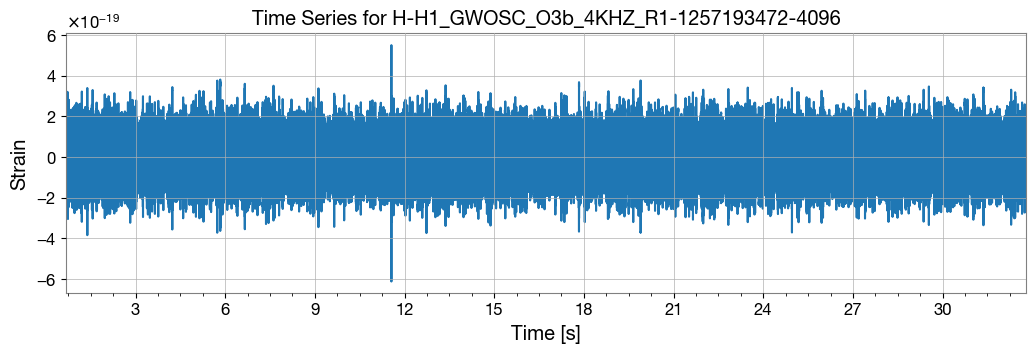

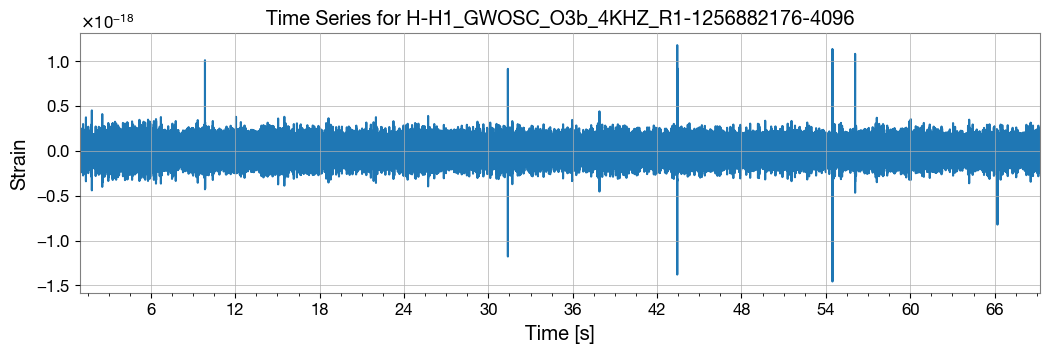

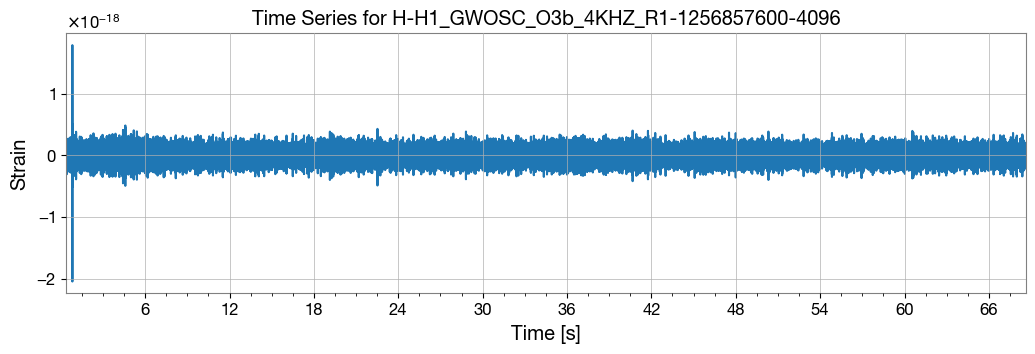

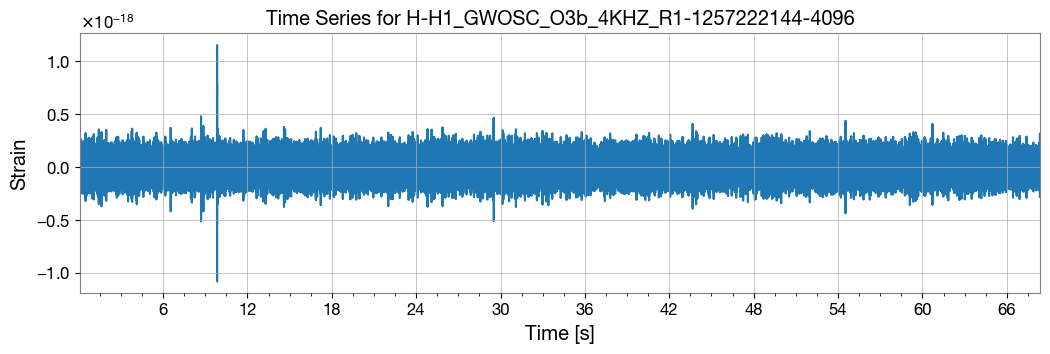

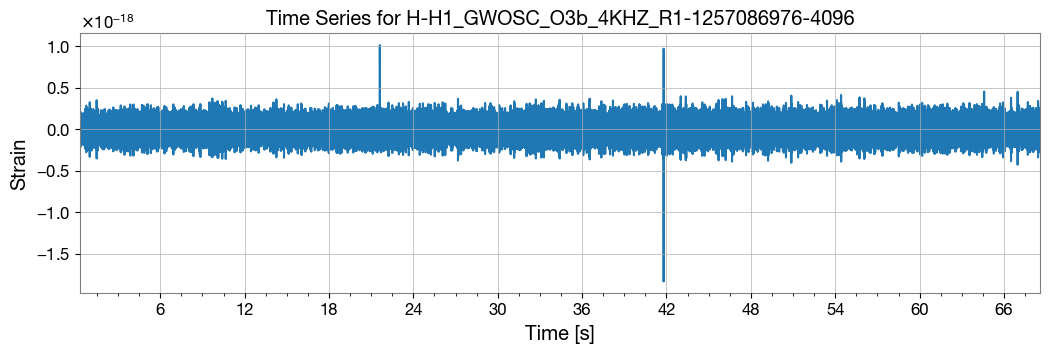

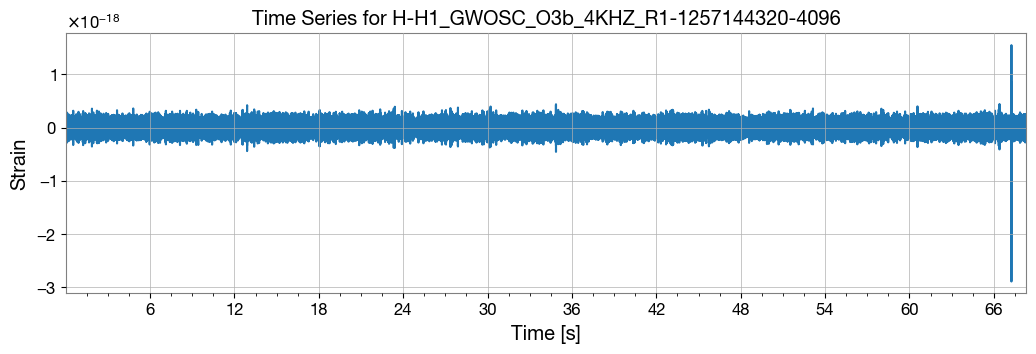

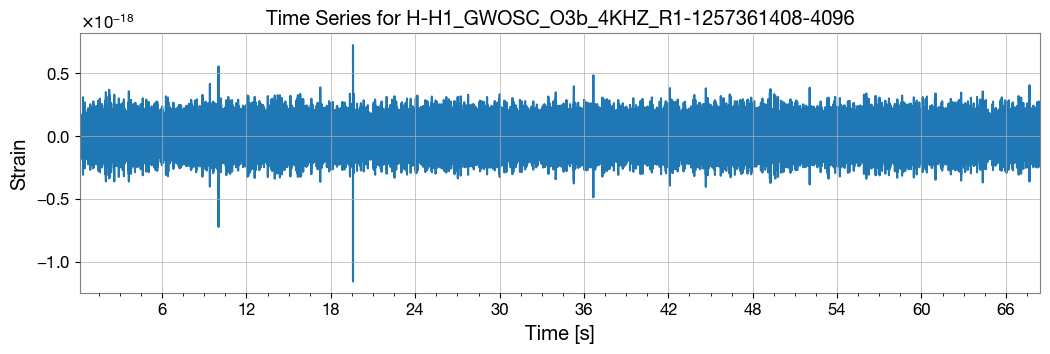

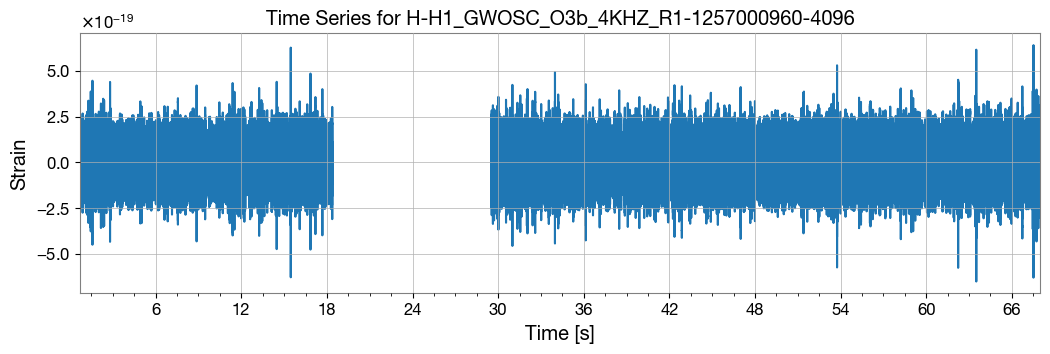

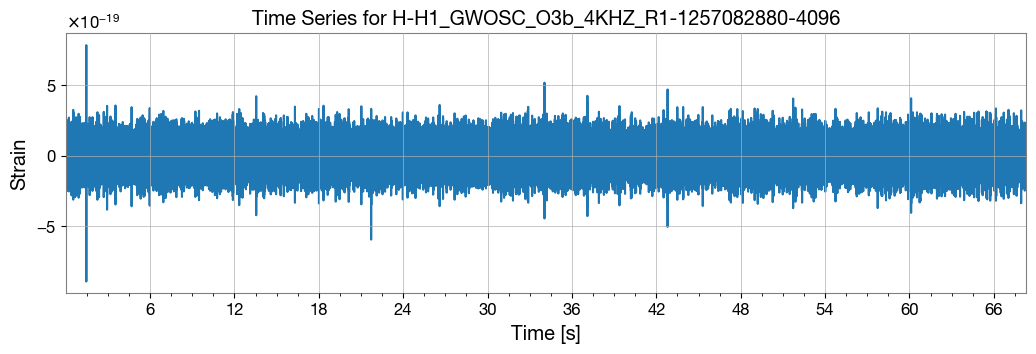

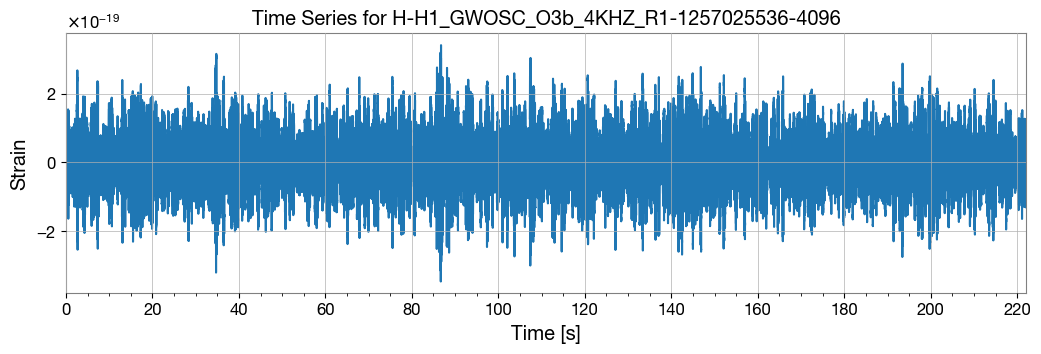

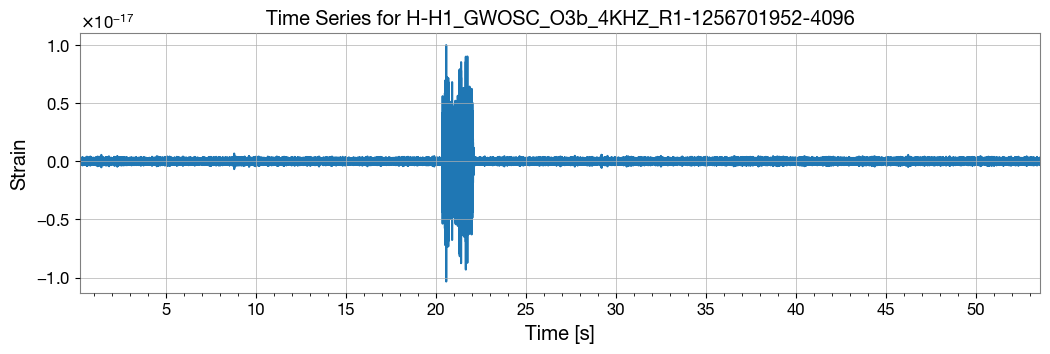

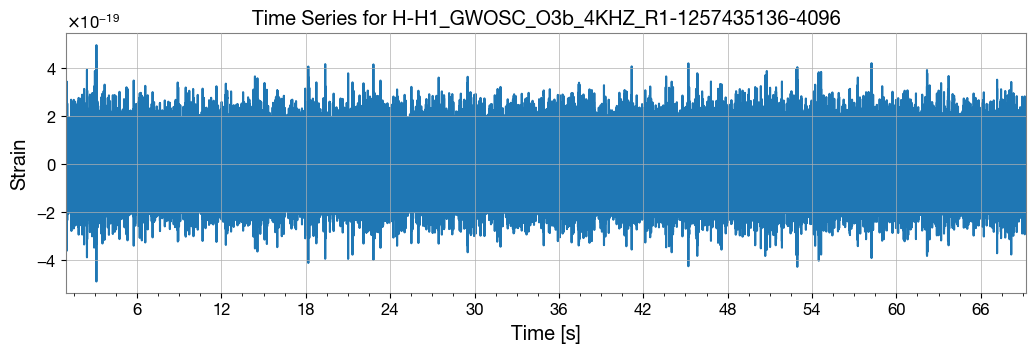

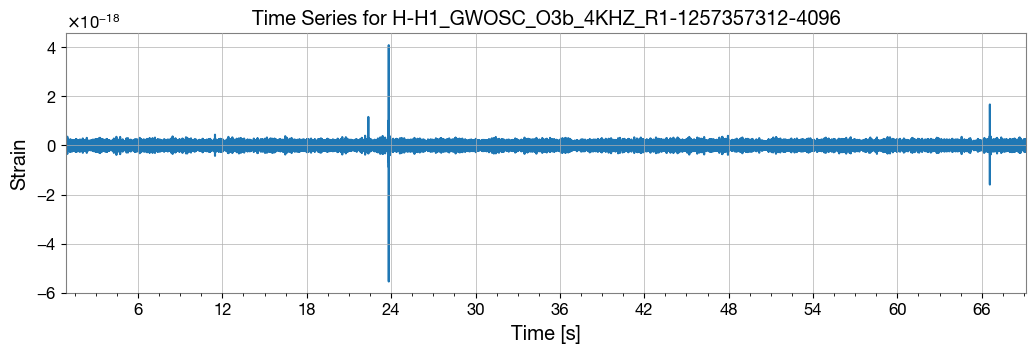

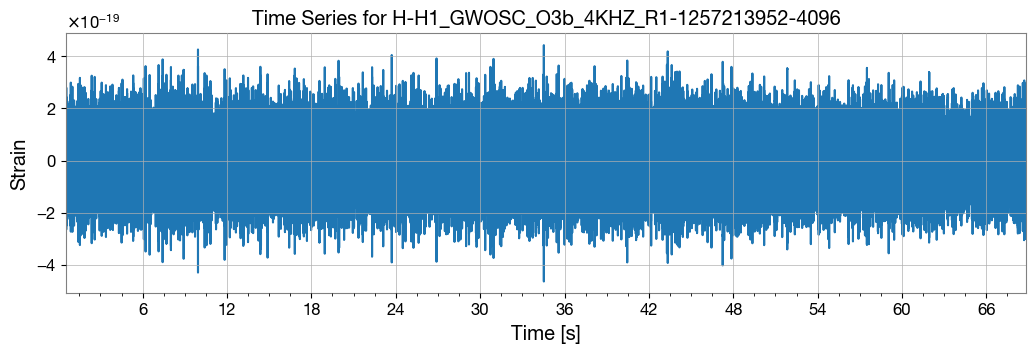

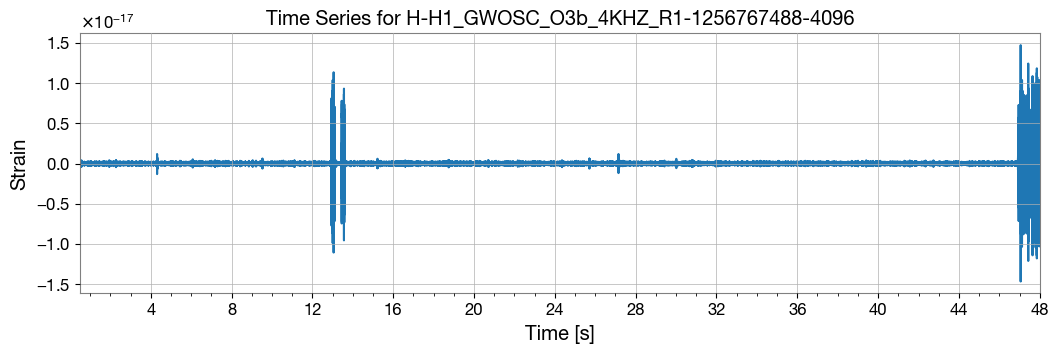

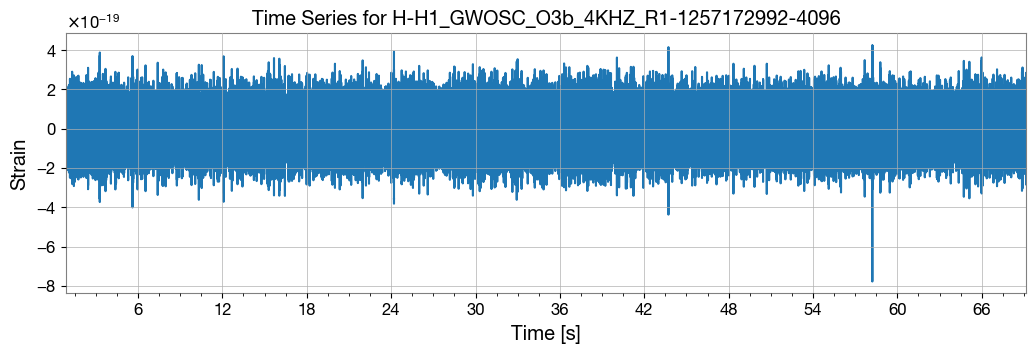

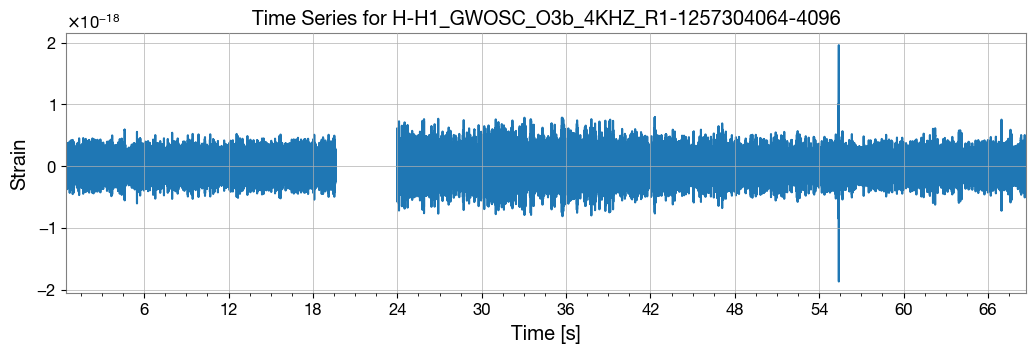

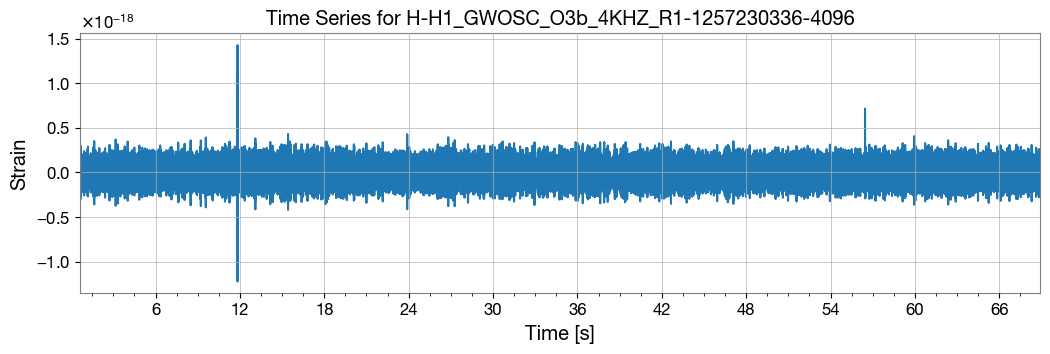

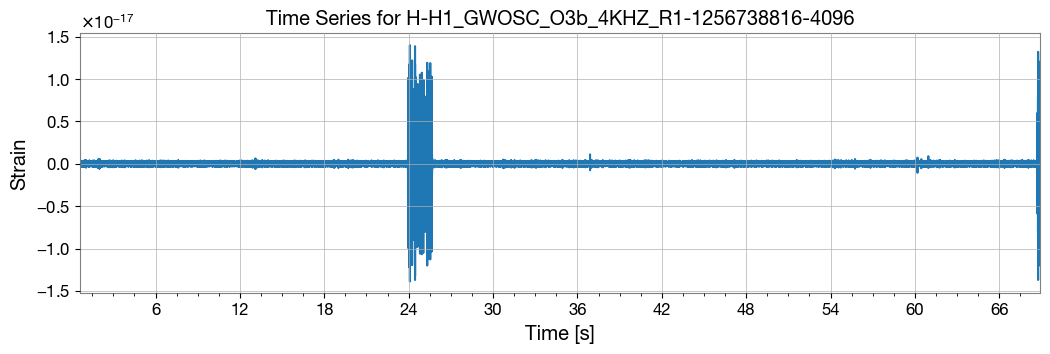

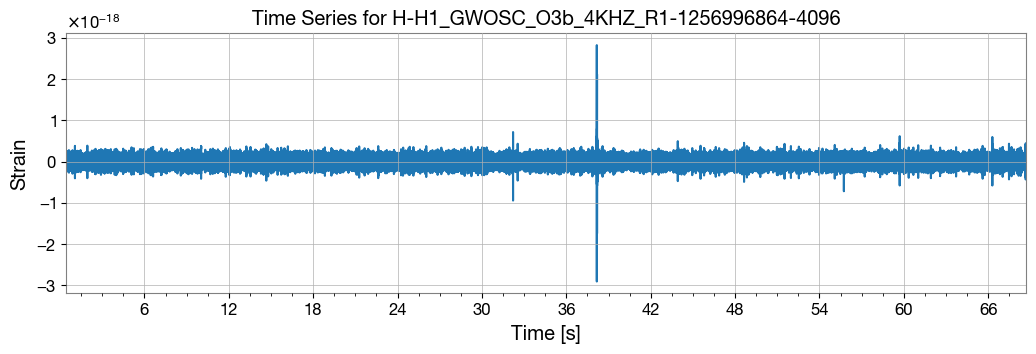

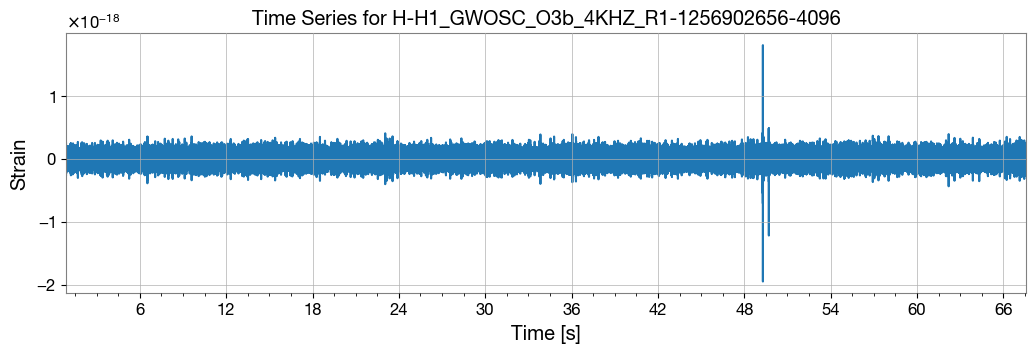

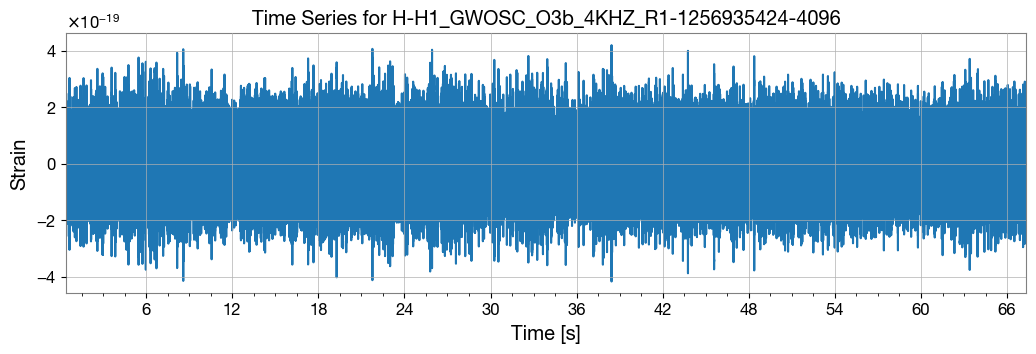

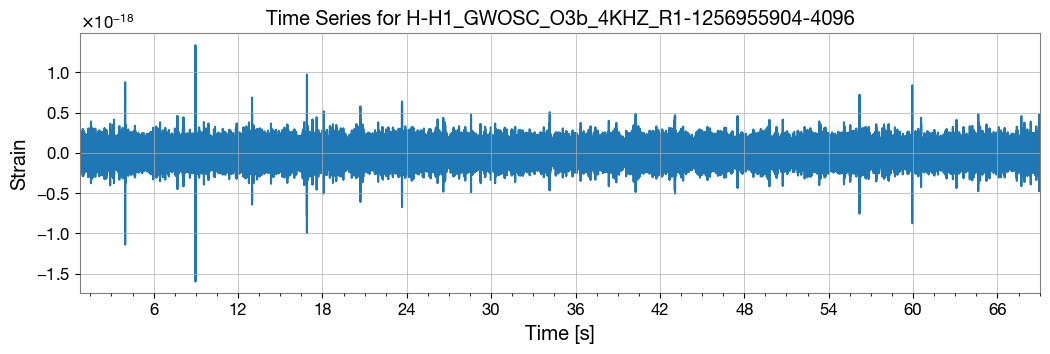

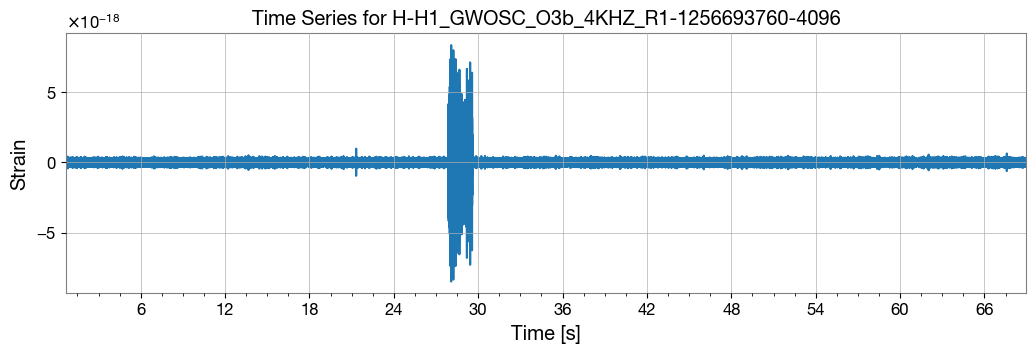

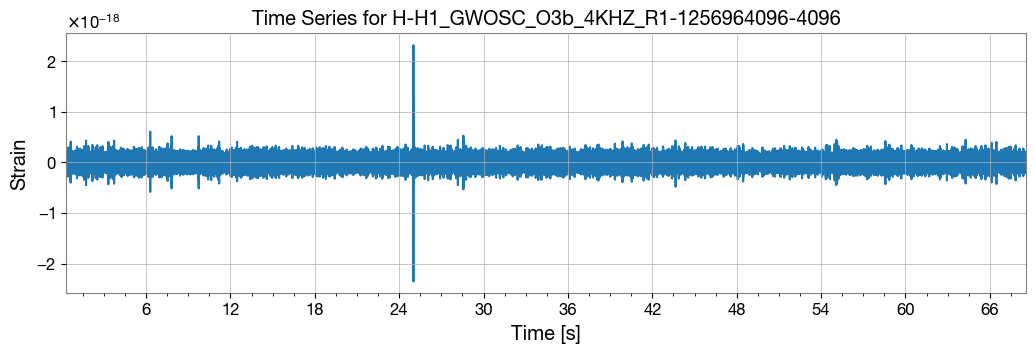

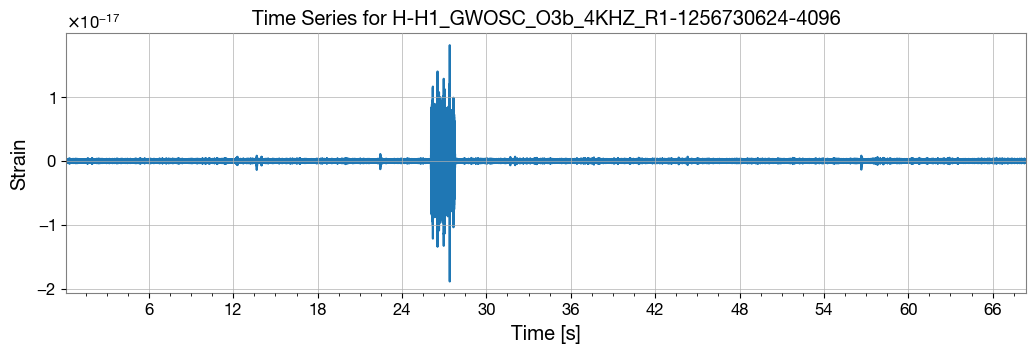

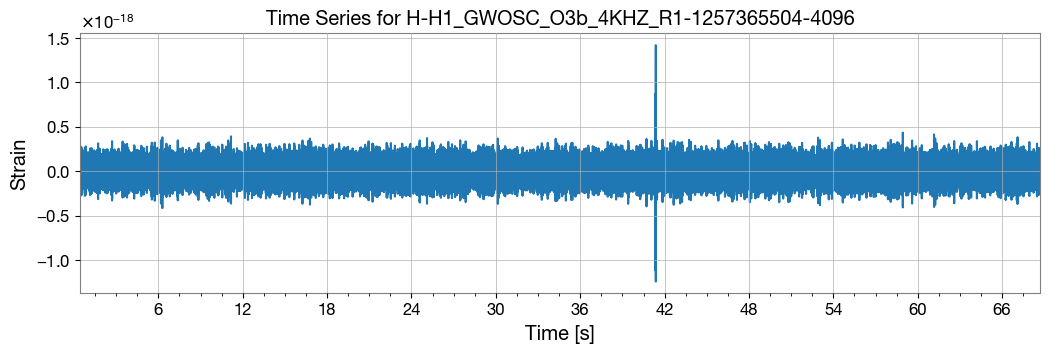

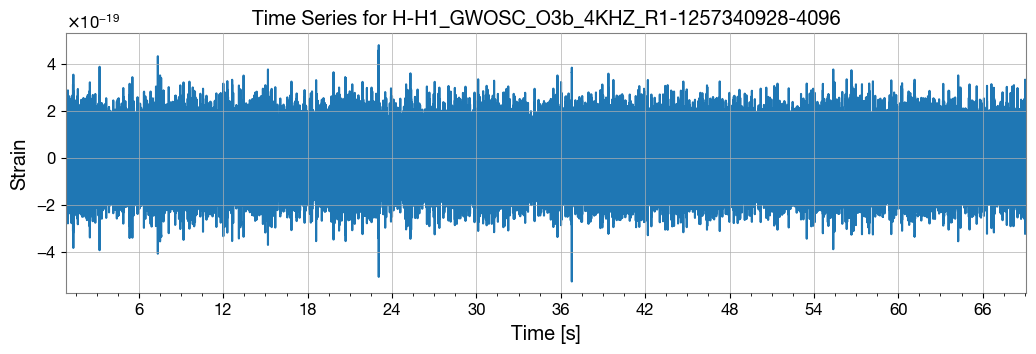

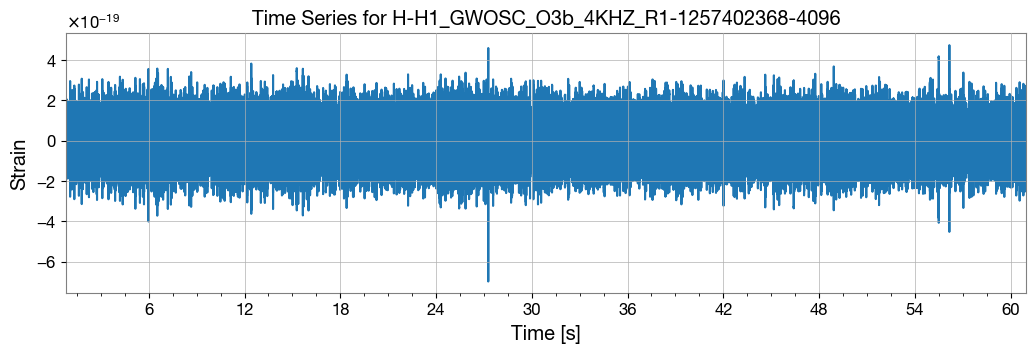

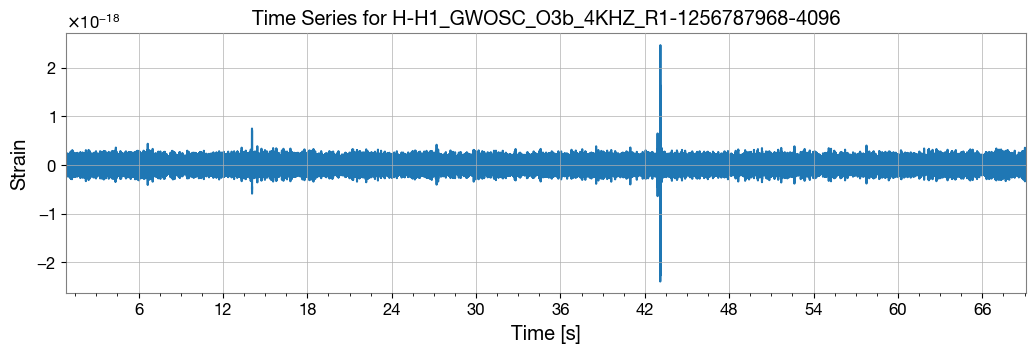

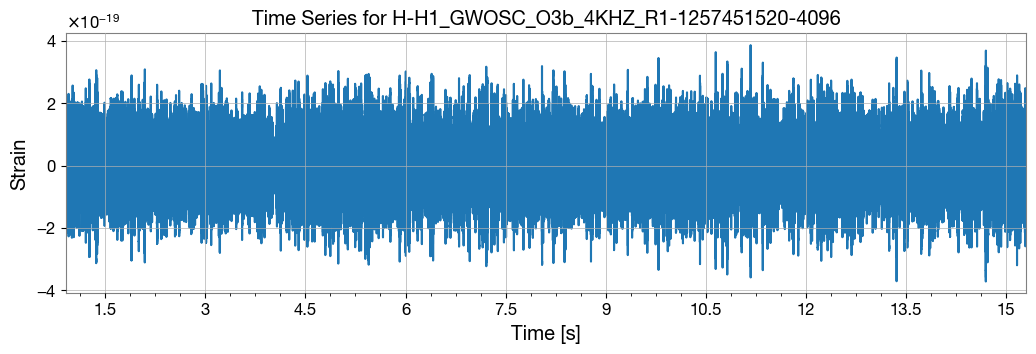

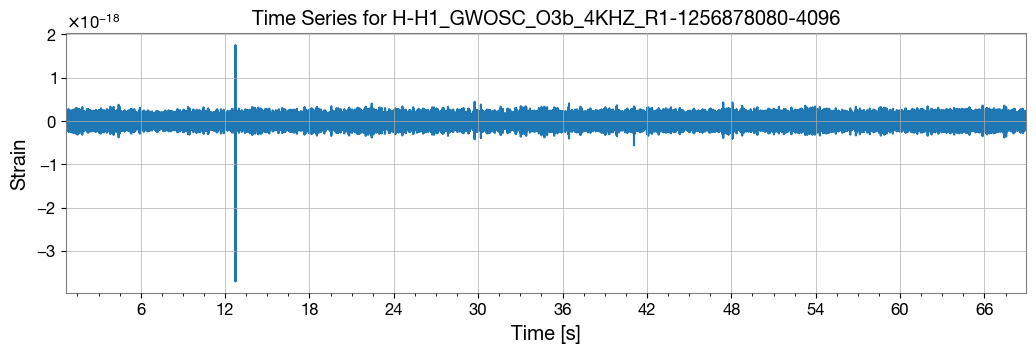

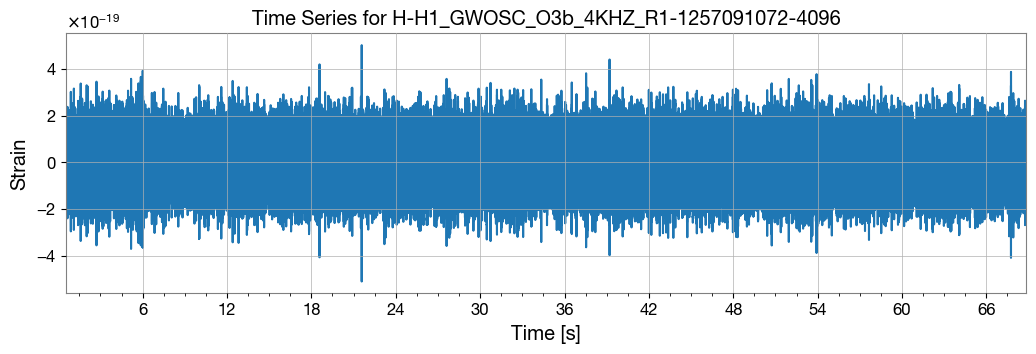

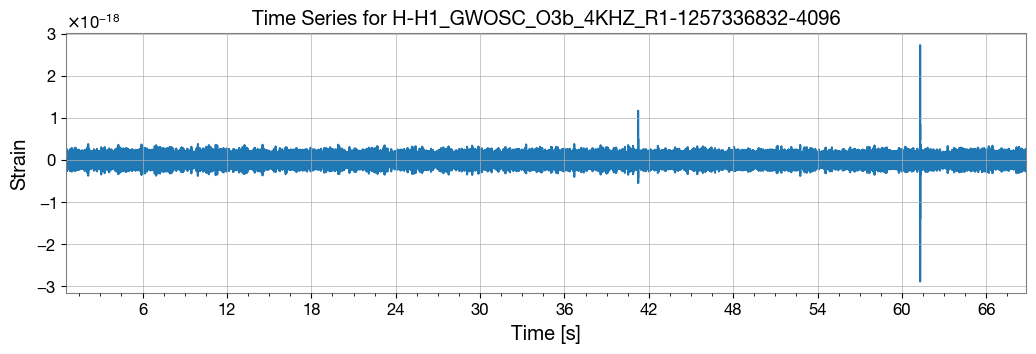

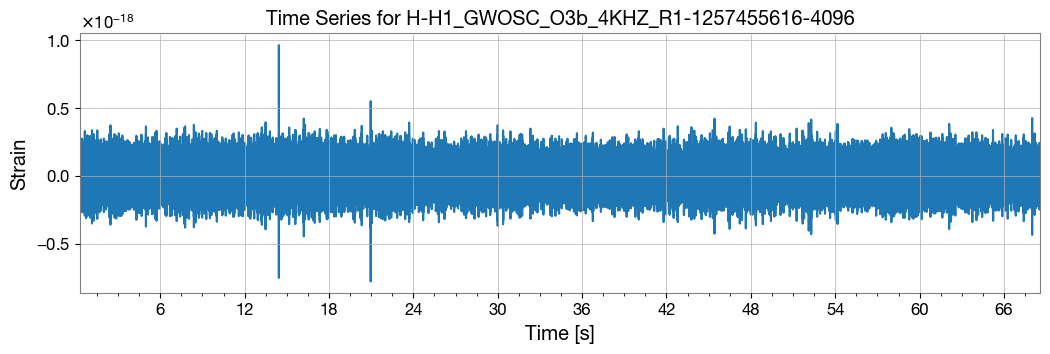

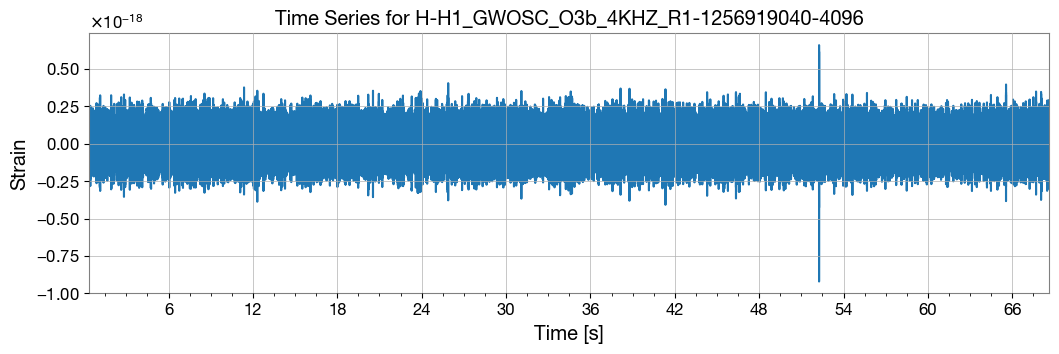

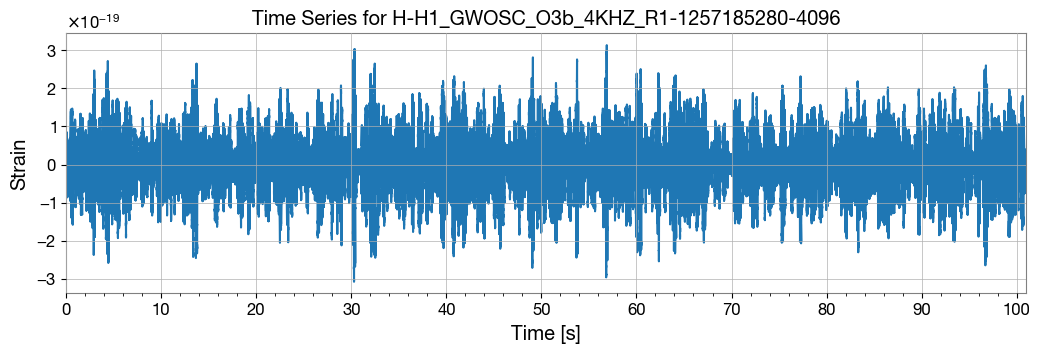

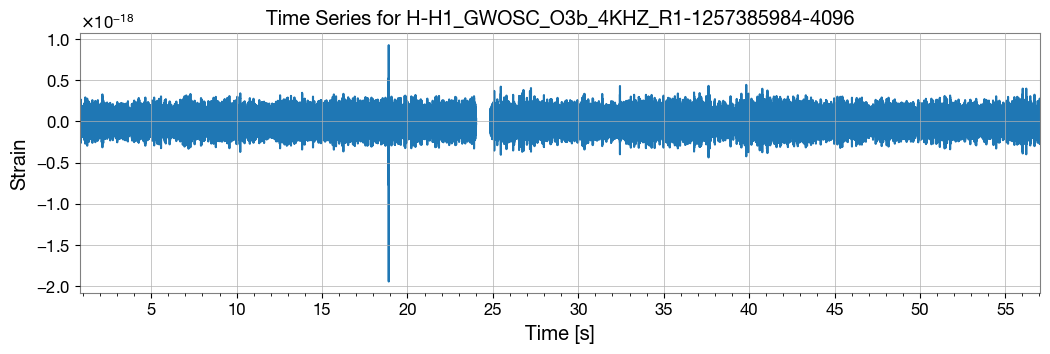

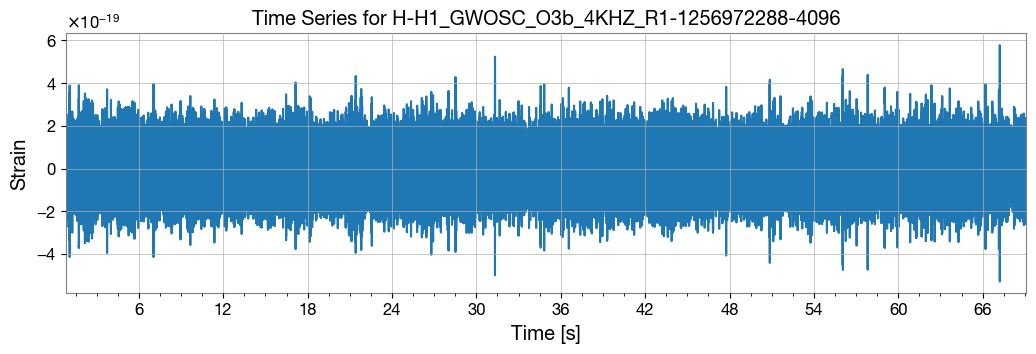

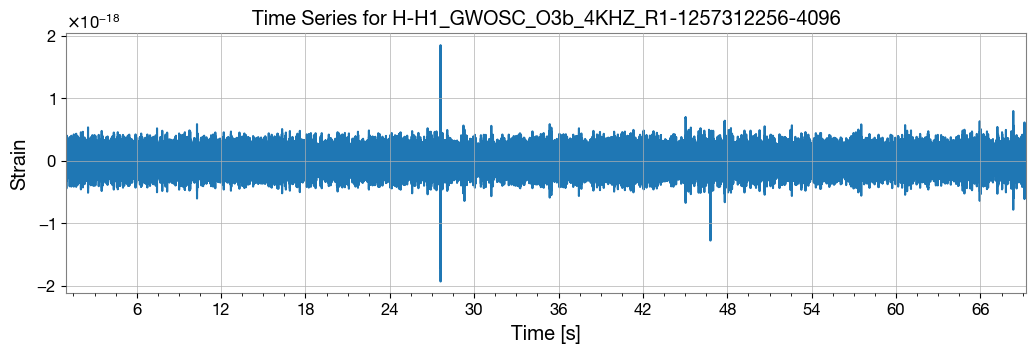

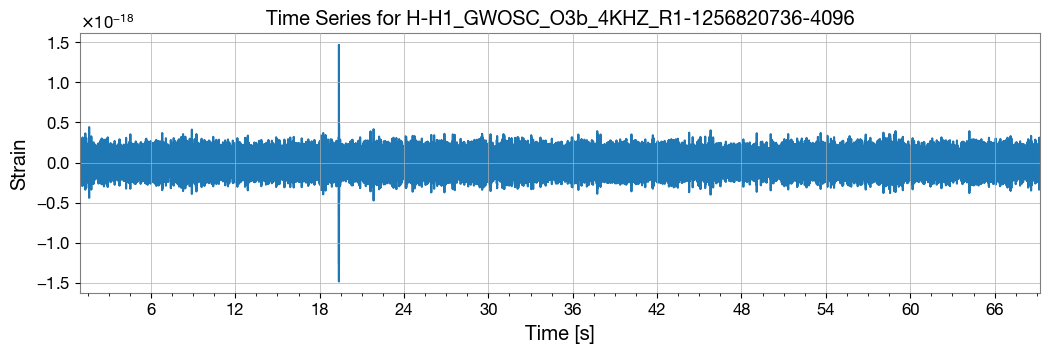

Failed to read or plot file ./H-H1_GWOSC_O3b_4KHZ_R1-1257472000-4096.hdf5: Unable to open file (truncated file: eof = 77635584, sblock->base_addr = 0, stored_eof = 129750051)


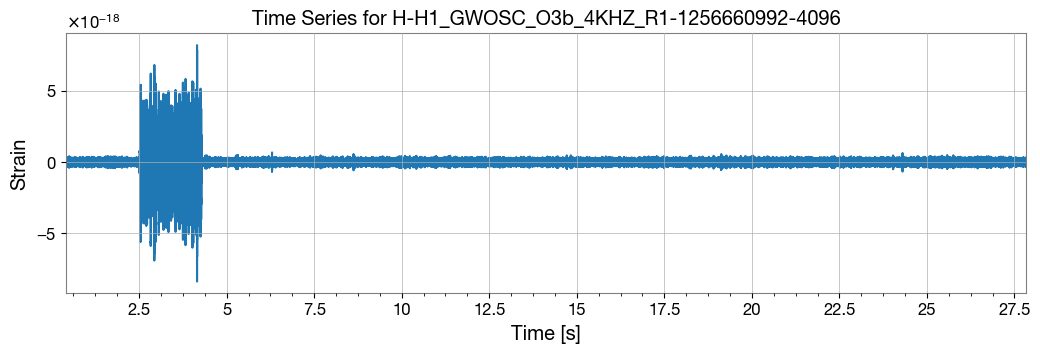

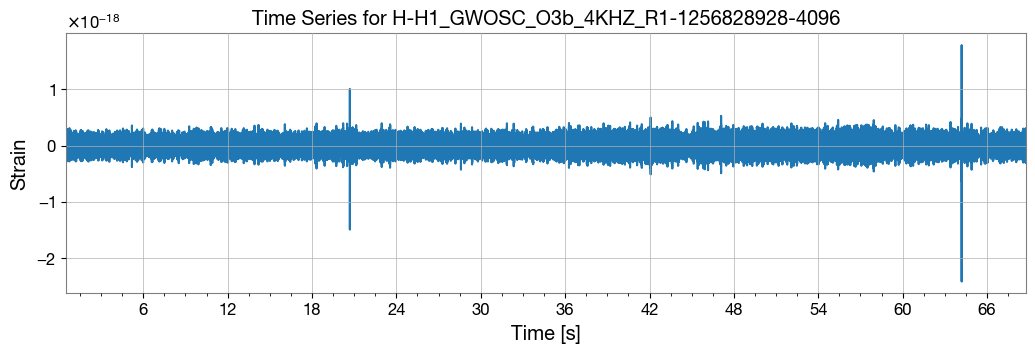

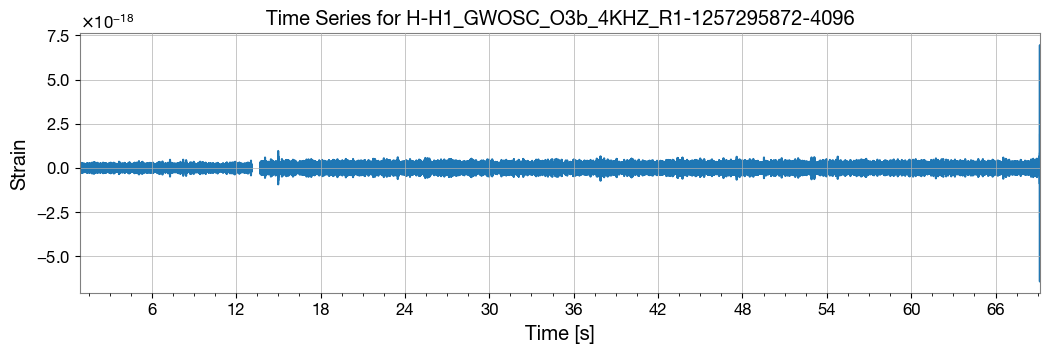

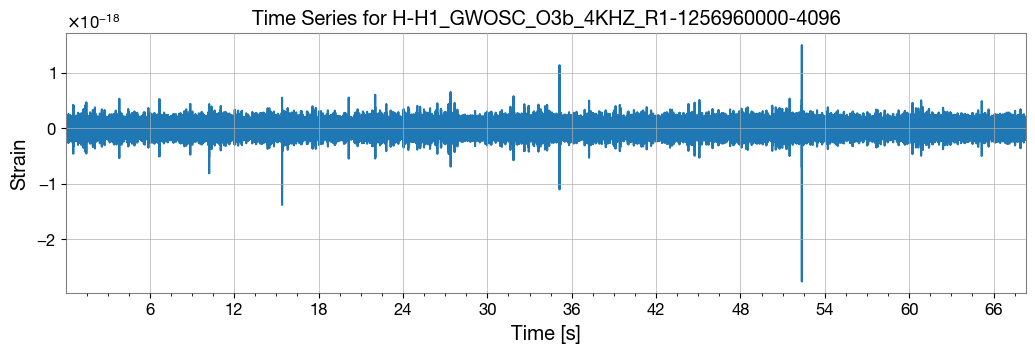

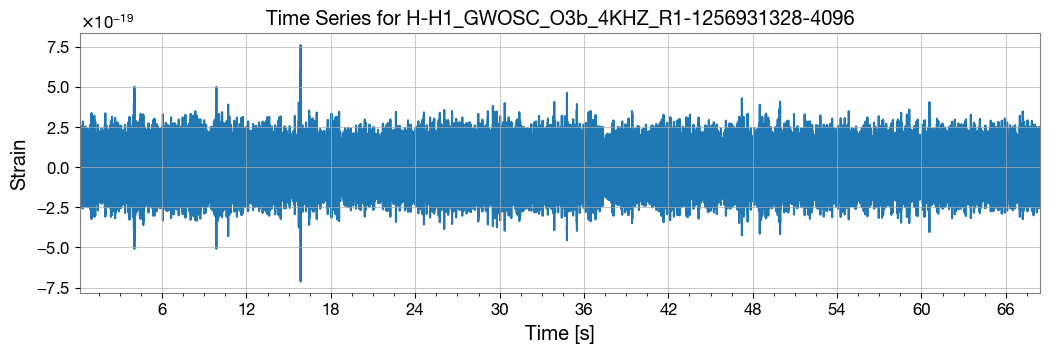

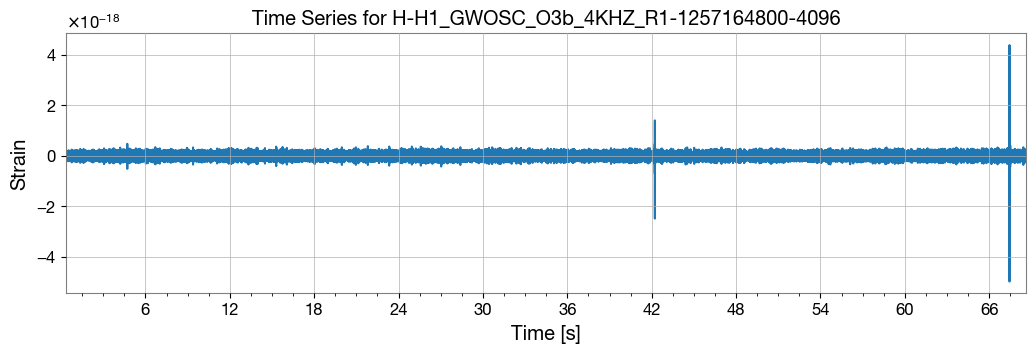

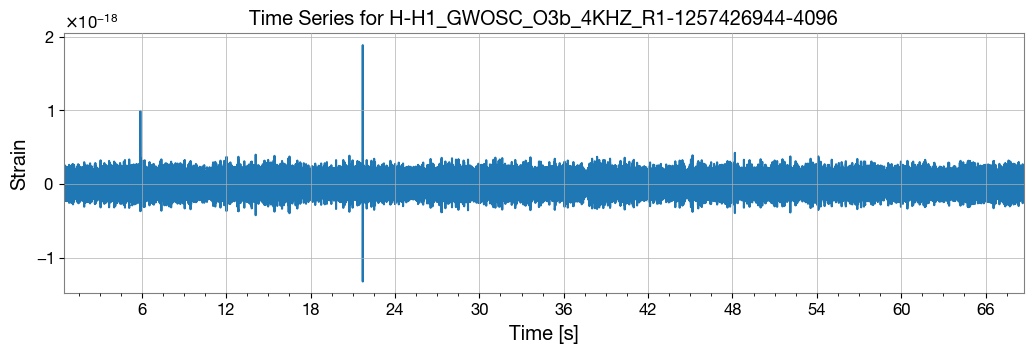

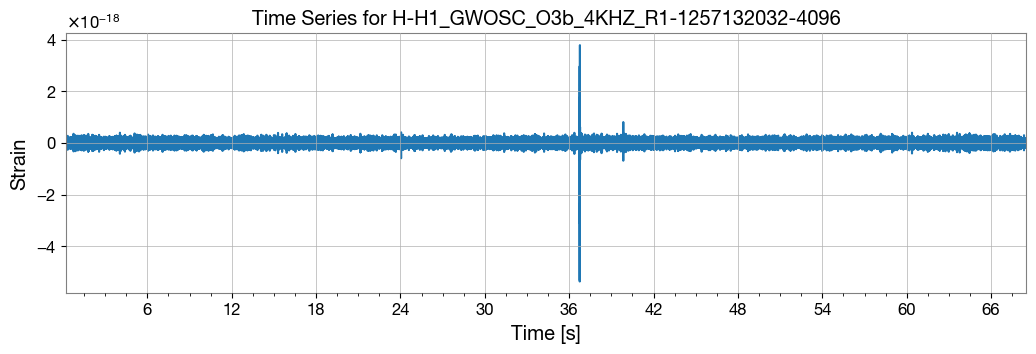

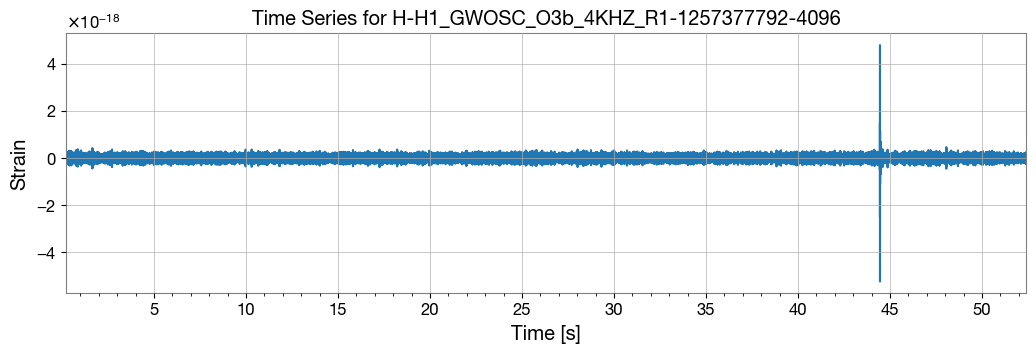

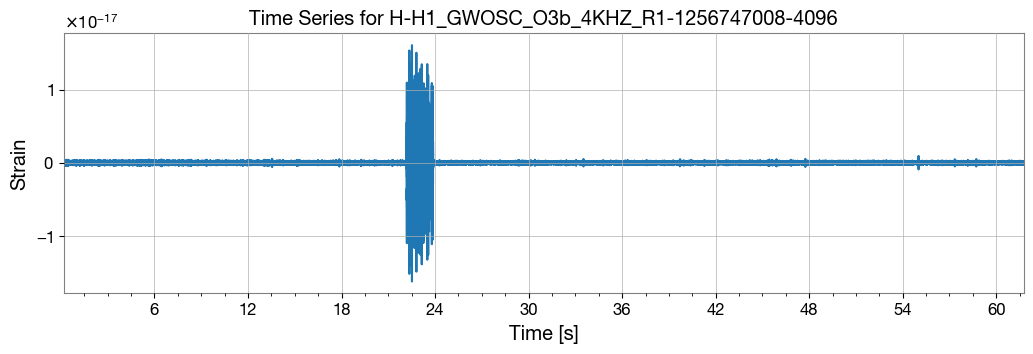

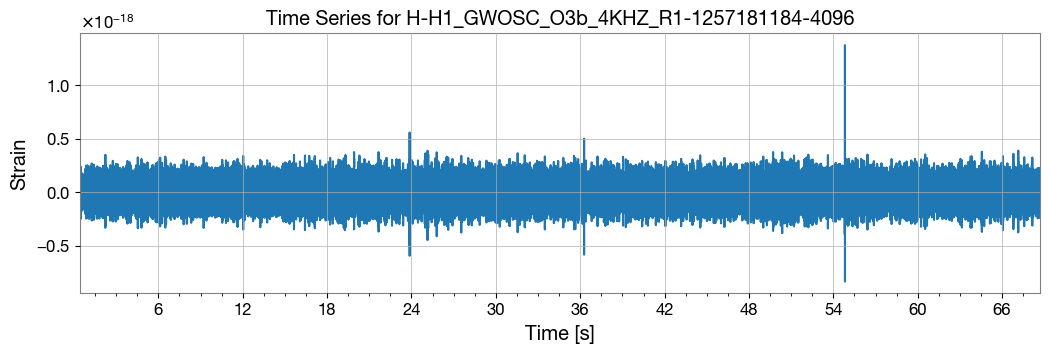

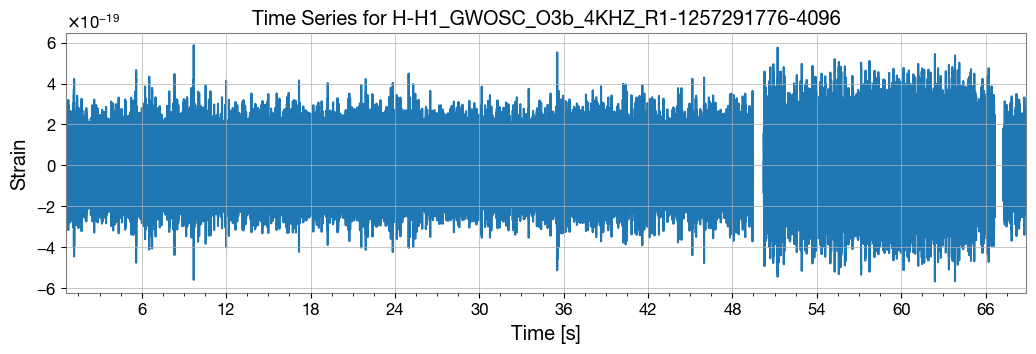

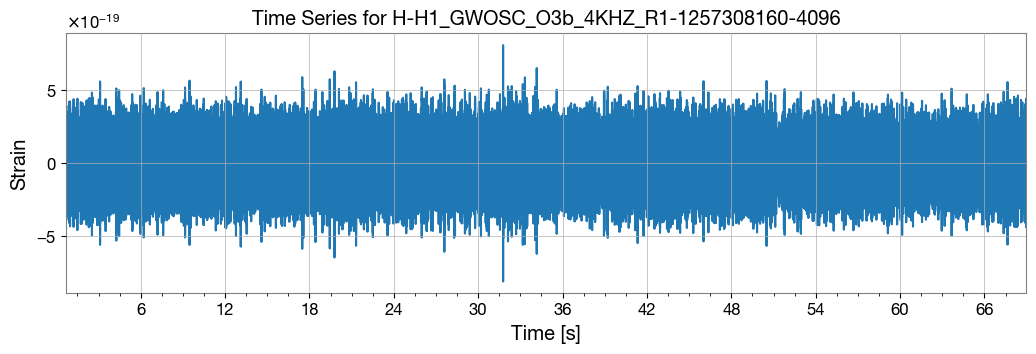

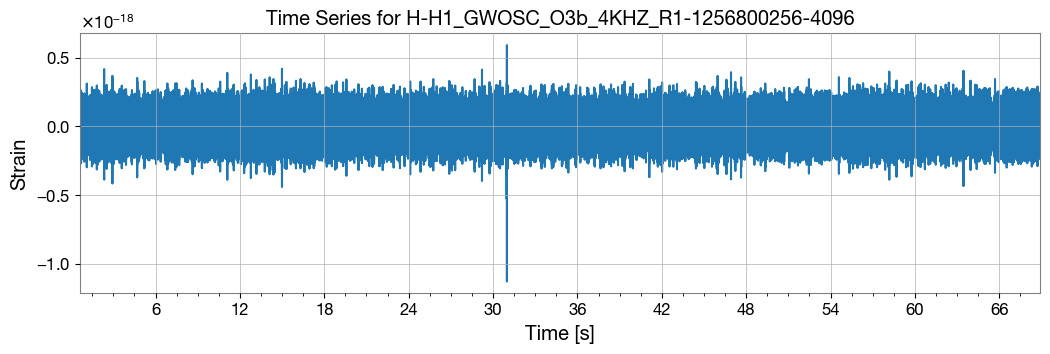

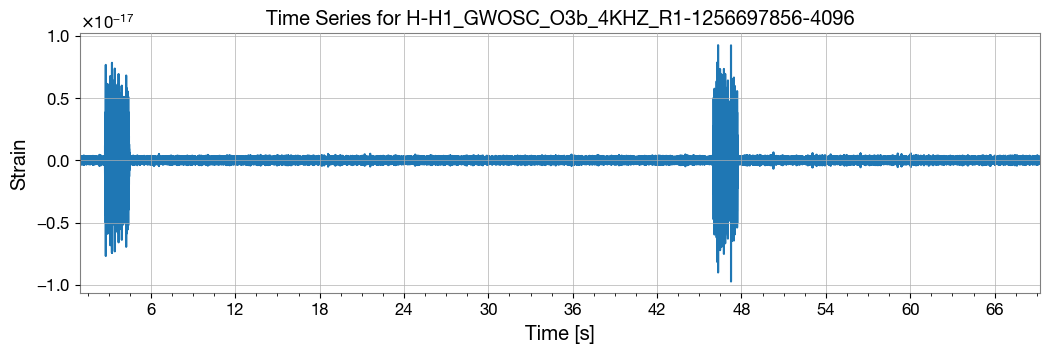

KeyboardInterrupt: 

In [3]:
import os
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

def plot_time_series(file_path):
    """Plot time series data from an HDF5 file."""
    try:
        tseries = TimeSeries.read(file_path, format='hdf5.gwosc')
        plot = tseries.plot()
        plot_title = os.path.basename(file_path).replace('.hdf5', '')
        plt.title(f"Time Series for {plot_title}")
        plt.xlabel("Time [s]")
        plt.ylabel("Strain")
        plt.show()
    except Exception as e:
        print(f"Failed to read or plot file {file_path}: {e}")

def main():
    directory = '.'  # Directory where your HDF5 files are stored
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.hdf5')]
    for file_path in files:
        plot_time_series(file_path)

if __name__ == "__main__":
    main()


In [23]:
import lal
import lalsimulation

In [28]:


def generate_waveform(mass1, mass2, distance, frequency, approximant):
    # Set up parameters
    params = lal.CreateDict()
    approximant_enum = lalsimulation.GetApproximantFromString(approximant)
    
    # Define the masses in SI units (kilograms)
    m1 = mass1 * lal.MSUN_SI
    m2 = mass2 * lal.MSUN_SI
    
    # Define the spins (a_x, a_y, a_z) for each object, assumed to be non-spinning here
    S1x, S1y, S1z = 0.0, 0.0, 0.0
    S2x, S2y, S2z = 0.0, 0.0, 0.0
    
    # Convert distance from parsecs to meters
    distance_meters = distance * lal.PC_SI
    
    # Define other parameters for waveform generation
    inclination = 0
    phiRef = 0
    longAscNodes = 0
    eccentricity = 0
    meanPerAno = 0
    delta_f = 1.0 / 16  # Sample interval in frequency domain
    f_min = frequency
    f_ref = frequency
    f_max = 2048  # Upper frequency limit

    # Generate the waveform
    hp, hc = lalsimulation.SimInspiralChooseFDWaveform(
        m1=m1,
        m2=m2,
        S1x=S1x, S1y=S1y, S1z=S1z,
        S2x=S2x, S2y=S2y, S2z=S2z,
        distance=distance_meters,
        inclination=inclination,
        phiRef=phiRef,
        longAscNodes=longAscNodes,
        eccentricity=eccentricity,
        meanPerAno=meanPerAno,
        deltaF=delta_f,
        f_min=f_min,
        f_ref=f_ref,
        f_max=f_max,
        LALpars=params,
        approximant=approximant_enum)
    return hp, hc
    

# Example usage
mass1 = 30  # Mass of the first black hole in solar masses
mass2 = 30  # Mass of the second black hole in solar masses
distance = 100  # Distance in parsecs
frequency = 20  # Starting frequency
approximant = 'SEOBNRv4'  # Waveform model

hp, hc = generate_waveform(mass1, mass2, distance, frequency, approximant)




XLAL Error - XLALSimInspiralGenerateFDWaveform (LALSimInspiral.c:525): generator does not provide a method to generate frequency-domain waveforms
XLAL Error - XLALSimInspiralGenerateFDWaveform (LALSimInspiral.c:525): Invalid argument


RuntimeError: Invalid argument

In [33]:


def generate_waveform(mass1, mass2, distance, frequency, approximant):
    # Set up parameters
    params = lal.CreateDict()
    approximant_enum = lalsimulation.GetApproximantFromString(approximant)
    
    # Define the masses in SI units (kilograms)
    m1 = mass1 * lal.MSUN_SI
    m2 = mass2 * lal.MSUN_SI
    
    # Define the spins (a_x, a_y, a_z) for each object, assumed to be non-spinning here
    S1x, S1y, S1z = 0.0, 0.0, 0.0
    S2x, S2y, S2z = 0.0, 0.0, 0.0
    
    # Convert distance from parsecs to meters
    distance_meters = distance * lal.PC_SI
    
    # Define other parameters for waveform generation
    inclination = 0
    phiRef = 0
    longAscNodes = 0
    eccentricity = 0
    meanPerAno = 0
    delta_f = 1.0 / 16  # Sample interval in frequency domain
    f_min = frequency
    f_ref = frequency
    f_max = 2048  # Upper frequency limit

    # Generate the waveform
    hp, hc = lalsimulation.SimInspiralChooseTDWaveform(
        m1*lal.MSUN_SI, m2*lal.MSUN_SI, 0., 0., 0., 0., 0., 0., 1*1e6*lal.PC_SI, 1.,
        phiRef, 0., 0., 0., 0., f_min, f_ref, None, lalsimulation.TaylorF2)
    return hp, hc
    

# Example usage
mass1 = 30  # Mass of the first black hole in solar masses
mass2 = 30  # Mass of the second black hole in solar masses
distance = 100  # Distance in parsecs
frequency = 20  # Starting frequency
approximant = 'SEOBNRv4'  # Waveform model

hp, hc = generate_waveform(mass1, mass2, distance, frequency, approximant)




XLAL Error - XLALSimInspiralGenerateTDWaveform (LALSimInspiral.c:481): generator does not provide a method to generate time-domain waveforms
XLAL Error - XLALSimInspiralGenerateTDWaveform (LALSimInspiral.c:481): Invalid argument


RuntimeError: Invalid argument

In [34]:
lalsimulation.SimInspiralChooseTDWaveform.__doc__

'SimInspiralChooseTDWaveform(REAL8 const m1, REAL8 const m2, REAL8 const s1x, REAL8 const s1y, REAL8 const s1z, REAL8 const s2x, REAL8 const s2y, REAL8 const s2z, REAL8 const distance, REAL8 const inclination, REAL8 const phiRef, REAL8 const longAscNodes, REAL8 const eccentricity, REAL8 const meanPerAno, REAL8 const deltaT, REAL8 const f_min, REAL8 f_ref, Dict params, Approximant const approximant) -> int'

In [ ]:
import numpy as np
from gwpy.timeseries import TimeSeries

# Load your data
# Assuming data is loaded into a TimeSeries object named 'data'
# Replace this with the actual code to load your data
directory = '.'  # Directory where your HDF5 files are stored
files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.hdf5')]
for file_path in files:
    data = TimeSeries.read(file_path, format='hdf5.gwosc')

# Compute the Power Spectral Density (PSD) using Welch's method
psd = data.psd(4, 2)  # Using 4-second FFT length and 2-second overlap as an example

# Whiten the data
whitened = data.whiten(fftlength=4, overlap=2, psd=psd)

# Compute the SNR by convolving the data with a template
# Assuming you have a template, otherwise, you might use the real part of the whitened data
# For demonstration, let's create a simple template:
# (In practice, you would use a waveform from a model or a matched filtering technique)
template = np.roll(whitened, int(whitened.sample_rate)).real  # A simple template as a shifted version of the whitened data

# Compute SNR
snr = (whitened * template).abs()

# Plotting
plot = snr.plot()
plot.show()

# Further steps would involve thresholding the SNR to detect potential signals
# and classifying the type of gravitational wave based on waveform analysis
